# Latihan-10 2D Kue Lapis

Latihan ini untuk pemodelan 2D model menggunakan library atau code dari bersumber dari komilasi code-code Agile
<br><br> _citation for this page: "Adi Widyantoro, 2021, Pertamina Seismic QI Course, Latihan-10 2D Kue Lapis, accessed MM DD, YYYY."_  
<br>
>(update terakhir tanggal 1 Juli 2021 oleh Adi Widyantoro)
<hr>

__Tahap-1__ 
<br> Program setup dan display sama seperti latihan sebelumnya. Gunakan hasil dari Latihan-2 data untuk latihan selanjutnya
<br> 

        special notes_: brugeslibrary adalah kumpulan pre-defined functions oleh Agile Geoscience bruges:
        https://github.com/agile-geoscience/bruges
        
        the library's credits go to bruges contributors: Evan Bianco, Ben Bougher, Matt Hall, Alessandro Amato del Monte, 
        Wes Hamlyn, Sean Ross-Ross

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
from scipy.signal import hilbert
import scipy as sp
import scipy.ndimage as snd
import copy
from matplotlib import cm
from f10kuelapis import *
mpl.style.use('seaborn') # default, seaborn

## Fun with Colors

sumber: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    
    cmaps:'Perceptually Uniform Sequential='viridis', 'plasma', 'inferno', 'magma', 'cividis'
    cmaps:'Sequential = Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 
          'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
    cmaps:'Qualitative'= 'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3',
           'tab10', 'tab20', 'tab20b', 'tab20c'

### Bulding layer model:

input dari Latihan-9:

    layer       | Vp | Vs | Rho |
    ------------------------------
    layer1_elog =[3.30, 1.85, 2.42]
    layer2_elog =[3.28, 1.77, 2.44]
    layer3_elog =[3.08, 1.72, 2.25]
    layer4_elog =[3.41, 1.96, 2.32]
    layer5_elog =[3.48, 1.85, 2.48]
    -------------------------------
    thickness =[30, 40, 20, 30, 30]
    -----------------------------------
    vplyr=[3.3, 3.28, 3.08, 3.41, 3.48]
    vslyr=[1.85, 1.77, 1.72, 1.96, 1.85]
    rholyr=[2.42, 2.44, 2.25, 2.32, 2.48]

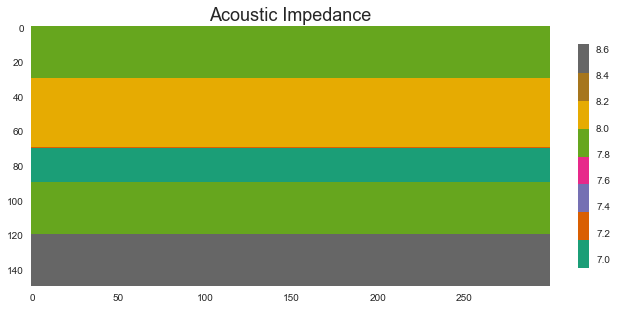

In [2]:
# keep it simple no fancy codes....................
ipmodel = np.zeros((150,300), dtype=float) 
ipmodel[0:30,:] = 3.3*2.42
ipmodel[30:70,:] = 3.28*2.44
ipmodel[70:90,:] = 3.08*2.25
ipmodel[90:120,:] = 3.41*2.32
ipmodel[120:,:] = 3.48*2.48
plt.subplots(figsize=(10, 6))
plt.imshow(ipmodel, aspect=1, cmap='Dark2')
plt.colorbar(fraction=0.02, pad=0.05)
plt.title('Acoustic Impedance', fontsize=18)
plt.grid(False)
plt.show()

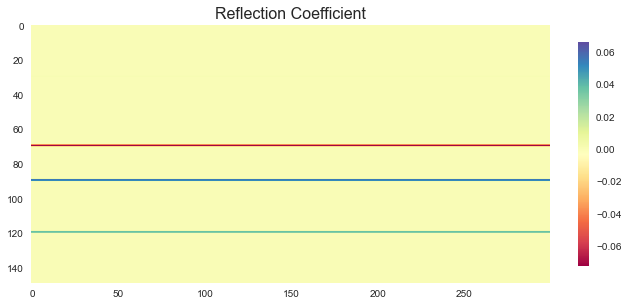

In [3]:
#-------------convolutional-----------------------------------------
rc = (ipmodel[1:] - ipmodel[:-1]) / (ipmodel[1:] + ipmodel[:-1])
maxrc = abs(np.amax(rc))
plt.figure(figsize=(10,6))
plt.imshow(rc, aspect=1, cmap='Spectral')
plt.colorbar(fraction=0.02, pad=0.05)
plt.title('Reflection Coefficient', fontsize=16)
plt.grid(False)
plt.show()

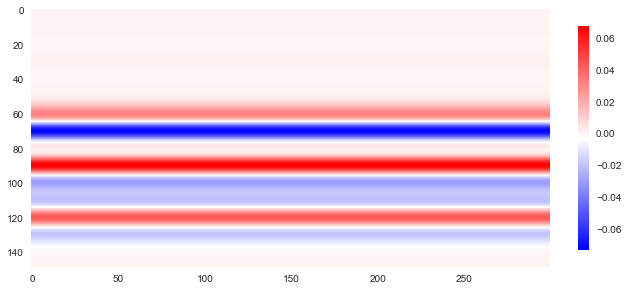

In [4]:
t,wavelet=ricker(20,200,2,0)
syn = np.apply_along_axis(lambda t: np.convolve(t, wavelet, mode='same'), axis=0, arr=rc)
plt.figure(figsize=(10,6))
plt.imshow(syn, cmap="bwr", aspect=1)
plt.colorbar(fraction=0.02, pad=0.05)
plt.grid(False)
plt.show()

## 3-Layers Partial Stacks

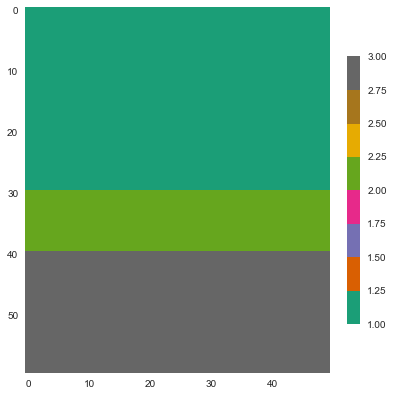

In [5]:
model3 = np.zeros((60,50), dtype=int) 
model3[0:30,:] = 1
model3[30:40,:] = 2
model3[40:,:] = 3
plt.subplots(figsize=(6, 7))
plt.imshow(model3, aspect=1, cmap='Dark2')
plt.colorbar(fraction=0.04, pad=0.05)
plt.grid(False)
plt.show()

In [6]:
ang=[5,20,40]
elprop3=np.array(([3.30, 2.42, 1.85],[3.08, 2.25, 1.72],[3.48, 2.48, 1.85]))
model3_vp, model3_vs, model3_rho=outputmodelvpvsrho(model3, elprop3)
rc_near3, rc_mid3, rc_far3=partialstacks(model3_vp,model3_vs,model3_rho,ang)
syn_near3=synthfrimage(rc_near3,wavelet)
syn_mid3=synthfrimage(rc_mid3,wavelet)
syn_far3=synthfrimage(rc_far3,wavelet)

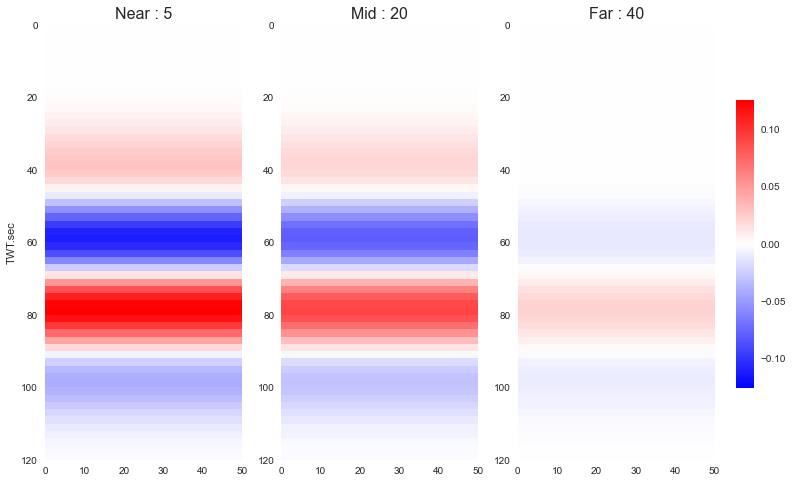

In [7]:
#----------------The Wigglesless...................
near=syn_near3
mid=syn_mid3
far=syn_far3
srt=2
clip=np.amax([abs(near), abs(mid), abs(far)])
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
im0=ax[0].imshow(near,extent=[0,near.shape[1],near.shape[0]*srt,0],
                 cmap='bwr',vmax=clip,vmin=-clip,aspect='auto')
ax[0].set_title("Near : 5",fontsize=16)
im1=ax[1].imshow(mid,extent=[0,near.shape[1],near.shape[0]*srt,0],
                 cmap='bwr',vmax=clip,vmin=-clip,aspect='auto')
ax[1].set_title("Mid : 20",fontsize=16)
im2=ax[2].imshow(far,extent=[0,near.shape[1],near.shape[0]*srt,0],
                 cmap='bwr',vmax=clip,vmin=-clip,aspect='auto')
ax[2].set_title("Far : 40",fontsize=16)
ax[0].set_ylabel('TWT.sec')
cax = f.add_axes([0.925, 0.25, 0.02, 0.5])
cbar=f.colorbar(im0, cax=cax, orientation='vertical')
for i in range(len(ax)):
    ax[i].grid(linestyle=":")
plt.show()

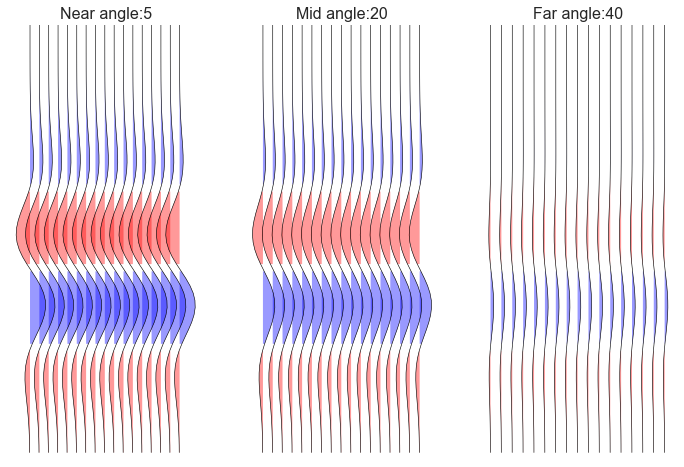

In [8]:
#----------------The Wiggles...................
near=syn_near3
mid=syn_mid3
far=syn_far3
srt=1; gain=5; skip=3
[n_samples,n_traces]=near.shape
t=range(n_samples)
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
ax1=axs[0];
for i in range(0, n_traces,skip):
    tracen=gain*near[:,i] / np.max(np.abs(near))
    ax1.plot(i+tracen,t,color='k', linewidth=0.6)
    ax1.fill_betweenx(t,tracen+i,i, where=tracen+i>i, facecolor="blue", linewidth=0, alpha=0.4)
    ax1.fill_betweenx(t,tracen+i,i, where=tracen+i<i, facecolor="red", linewidth=0, alpha=0.4)
ax1.set_title("Near angle:5", fontsize=16)
ax2=axs[1];
for i in range(0, n_traces,skip):
    tracem=gain*mid[:,i] / np.max(np.abs(near))
    ax2.plot(i+tracem,t,color='k', linewidth=0.6)
    ax2.fill_betweenx(t,tracem+i,i, where=tracem+i>i, facecolor="blue", linewidth=0, alpha=0.4)
    ax2.fill_betweenx(t,tracem+i,i, where=tracem+i<i, facecolor="red", linewidth=0, alpha=0.4)
ax2.set_title("Mid angle:20", fontsize=16)
ax3=axs[2];
for i in range(0, n_traces,skip):
    tracef=gain*far[:,i] / np.max(np.abs(near))
    ax3.plot(i+tracef,t,color='k', linewidth=0.6)
    ax3.fill_betweenx(t,tracef+i,i, where=tracef+i>i, facecolor="blue", linewidth=0, alpha=0.4)
    ax3.fill_betweenx(t,tracef+i,i, where=tracef+i<i, facecolor="red", linewidth=0, alpha=0.4)
ax3.set_title("Far angle:40", fontsize=16)
for aa in [ax1, ax2, ax3]:
    aa.grid(linestyle=":", color="gray"); aa.set_ylim([0,n_samples])
    aa.invert_yaxis()
    aa.axis('off')
plt.show()

<h1><center>-Akhir Program Latihan-10-<center></h1>